In [105]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [106]:
trash_pickups = pd.read_csv('../data/trash_hauler_report_with_lat_lng.csv')
trash_pickups


,Request Number,Date Opened,Request,Description,Incident Address,Zip Code,Trash Hauler,Trash Route,Council District,State Plan X,State Plan Y,LONGITUDE,LATITUDE
0,25270,11/1/2017,Trash - Backdoor,"house with the wheel chair ramp, they share dr...",3817 Crouch Dr,37207.0,RED RIVER,3205,2.0,1727970.412,686779.4781,-86.815392,36.217292
1,25274,11/1/2017,Trash - Curbside/Alley Missed Pickup,Curb/Trash miss Tuesday.,4028 Clarksville Pike,37218.0,RED RIVER,4202,1.0,1721259.366,685444.7996,-86.838103,36.213470
2,25276,11/1/2017,Trash - Curbside/Alley Missed Pickup,Curb/trash miss Tuesday.,6528 Thunderbird Dr,37209.0,RED RIVER,4205,20.0,1707026.753,659887.4716,-86.885562,36.142923
3,25307,11/1/2017,Trash - Curbside/Alley Missed Pickup,missed,2603 old matthews rd,37207.0,WASTE IND,2206,2.0,1735691.771,685027.2459,-86.789170,36.212652
4,25312,11/1/2017,Trash - Curbside/Alley Missed Pickup,Missed the even side of the road.,604 croley dr,37209.0,RED RIVER,4203,20.0,1710185.772,664205.1011,-86.874995,36.154861
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20221,267125,11/1/2019,Trash - Curbside/Alley Missed Pickup,MISSED...NEIGHBORS MISSED,2731 Murfreesboro Pike,37013.0,RED RIVER,4502,32.0,1781137.263,632448.5511,-86.633970,36.069130
20222,267126,11/1/2019,Trash - Curbside/Alley Missed Pickup,entire alley,"1621 Long Ave, Nashville, TN 37206, United States",37206.0,METRO,9508,6.0,1749711.399,669201.6016,-86.741242,36.169482
20223,267130,11/1/2019,Trash - Curbside/Alley Missed Pickup,missed several,"2943 Windemere Cir, Nashville, TN 37214, Unite...",37214.0,RED RIVER,1502,15.0,1770293.388,674936.3038,-86.671647,36.185643
20224,267134,11/1/2019,Trash - Curbside/Alley Missed Pickup,Caller stated trash was missed & were only pic...,"3325 Murfreesboro Pike, Nashville, TN 37013, U...",37013.0,RED RIVER,4502,32.0,1785224.998,627146.4002,-86.620025,36.054637


In [107]:
print(trash_pickups.columns)
print(trash_pickups.head())

Index(['Request Number', 'Date Opened', 'Request', 'Description',
       'Incident Address', 'Zip Code', 'Trash Hauler', 'Trash Route',
       'Council District', 'State Plan X', 'State Plan Y', 'LONGITUDE',
       'LATITUDE'],
      dtype='object')
   Request Number Date Opened                               Request  \
0           25270   11/1/2017                      Trash - Backdoor   
1           25274   11/1/2017  Trash - Curbside/Alley Missed Pickup   
2           25276   11/1/2017  Trash - Curbside/Alley Missed Pickup   
3           25307   11/1/2017  Trash - Curbside/Alley Missed Pickup   
4           25312   11/1/2017  Trash - Curbside/Alley Missed Pickup   

                                         Description       Incident Address  \
0  house with the wheel chair ramp, they share dr...         3817 Crouch Dr   
1                           Curb/Trash miss Tuesday.  4028 Clarksville Pike   
2                           Curb/trash miss Tuesday.    6528 Thunderbird Dr   
3      

In [108]:
missed_pickups = trash_pickups[trash_pickups['Request'].str.contains('missed pickup', case=False, na=False)]
print(f"Number of missed pickups: {len(missed_pickups)}")

Number of missed pickups: 15028


In [109]:
pickup_counts = missed_pickups.groupby('Incident Address').size()
fined_counts = pickup_counts[pickup_counts > 1] - 1
total_damages = fined_counts.sum() * 200
total_damages


720800

What other types of complaints are there?

In [110]:
complaint_types = trash_pickups['Request'].value_counts()
print(complaint_types)

Request
Trash - Curbside/Alley Missed Pickup    15028
Trash - Backdoor                         2629
Trash Collection Complaint               2312
Damage to Property                        257
Name: count, dtype: int64


In [111]:
complaint_df = complaint_types.reset_index()
complaint_df.columns = ['Request', 'Count']
print(complaint_df)

                                Request  Count
0  Trash - Curbside/Alley Missed Pickup  15028
1                      Trash - Backdoor   2629
2            Trash Collection Complaint   2312
3                    Damage to Property    257


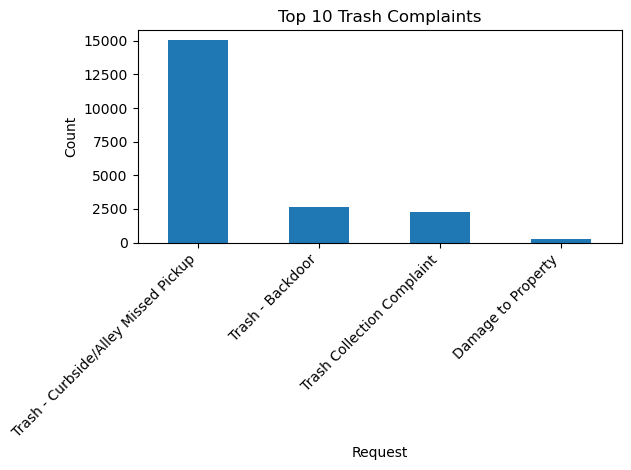

In [112]:
import matplotlib.pyplot as plt

complaint_df.head(10).plot(kind='bar', x='Request', y='Count', legend=False)
plt.title('Top 10 Trash Complaints')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Are there any geospatial analysis you can do?  Which visualizations can you create?

In [113]:
import geopandas as gpd
import folium
from folium.plugins import HeatMap

nashville_center = [36.1627, -86.7816]
map_heat = folium.Map(location=nashville_center, zoom_start=11, tiles='CartoDB positron')

missed_pickups = trash_pickups[trash_pickups['Request'].str.contains('missed pickup', case=False, na=False)]

heat_data = missed_pickups[['LATITUDE', 'LONGITUDE']].dropna()
heat_data_list = heat_data.values.tolist()

HeatMap(heat_data_list, radius=10).add_to(map_heat)

map_heat.save("missed_pickups_heatmap.html")

In [114]:
from IPython.display import IFrame
IFrame('missed_pickups_heatmap.html', width=1000, height=500)

 How do metro crews compare to the contractor's performance?

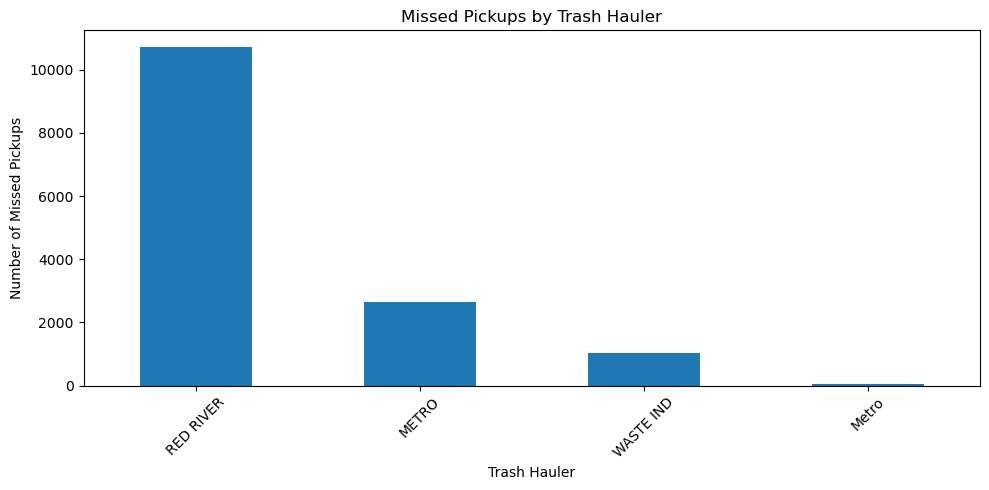

In [115]:
import matplotlib.pyplot as plt

missed_pickups = trash_pickups[trash_pickups['Request'].str.contains('missed pickup', case=False, na=False)]
missed_by_hauler = missed_pickups['Trash Hauler'].value_counts()
missed_by_hauler.plot(kind='bar', title='Missed Pickups by Trash Hauler', figsize=(10, 5))
plt.ylabel('Number of Missed Pickups')
plt.xlabel('Trash Hauler')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

How much does each trash hauler owe?

In [116]:
import pandas as pd



What were to total missed pickup by route?

In [117]:
missed_by_route = missed_pickups.groupby('Trash Route').size().reset_index(name='Missed Pickups').sort_values(by='Missed Pickups', ascending=False)
print(missed_by_route)

    Trash Route  Missed Pickups
133        4504             305
124        4404             246
74         3302             230
80         3305             215
150        9303             209
..          ...             ...
52        2405S               3
105       4201S               2
77        3303S               2
59        2505S               2
22        1502S               1

[172 rows x 2 columns]
